In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,36,103,85
1,2,Female,34,103,23
2,3,Female,32,103,69
3,4,Male,33,113,8
4,5,Female,38,113,91


In [4]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.039087,0.381820,0.016560
Age,-0.039087,1.000000,-0.020551,-0.284538
Annual Income (k$),0.381820,-0.020551,1.000000,0.005362
Spending Score (1-100),0.016560,-0.284538,0.005362,1.000000


F:\Users\Raveena Sachini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

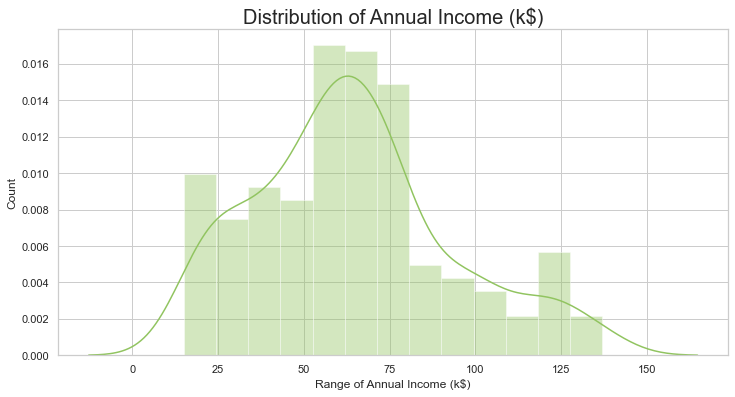

In [38]:
#Distribution of Annnual Income
plt.figure(figsize=(12, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'], color="#91C460")
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')